This is how much space the figure will take up on letter paper


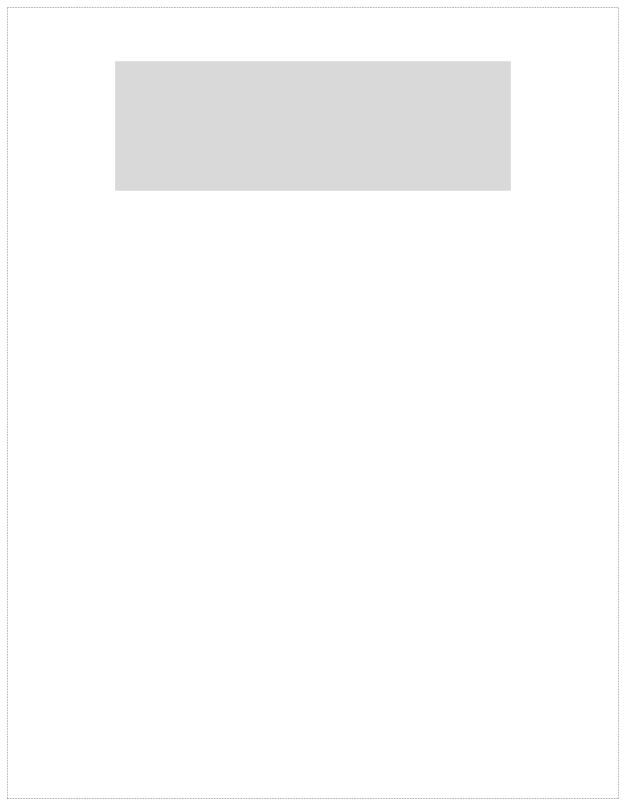

In [14]:
__PRODUCTION__ = 1
__NAME__       = 'optimization2'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.8

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [4]:
import functools
import numpy as np
import colorsys
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import json
import pickle

from symfac.experimental import RBFExpansionV2

In [8]:
x_20,y_20,name0 = pickle.loads(open('data/stoc-optimization-methods-SGD.pickle', 'rb').read())
x_21,y_21,name1 = pickle.loads(open('data/stoc-optimization-methods-Adam.pickle', 'rb').read())
x_22,y_22,name2 = pickle.loads(open('data/stoc-optimization-methods-Adadelta.pickle', 'rb').read())
x_23,y_23,name3 = pickle.loads(open('data/stoc-optimization-methods-Adagrad.pickle', 'rb').read())
x_24,y_24,name4 = pickle.loads(open('data/stoc-optimization-methods-RMSprop.pickle', 'rb').read())
x_25,y_25,name5 = pickle.loads(open('data/stoc-optimization-methods-AdamW.pickle', 'rb').read())
x_26,y_26,name6 = pickle.loads(open('data/stoc-optimization-methods-ASGD.pickle', 'rb').read())

In [9]:
x_40,y_40,name40 = pickle.loads(open('data/stoc4-optimization-methods-SGD.pickle', 'rb').read())
x_41,y_41,name41 = pickle.loads(open('data/stoc4-optimization-methods-Adam.pickle', 'rb').read())
x_42,y_42,name42 = pickle.loads(open('data/stoc4-optimization-methods-Adadelta.pickle', 'rb').read())
x_43,y_43,name43 = pickle.loads(open('data/stoc4-optimization-methods-Adagrad.pickle', 'rb').read())
x_44,y_44,name44 = pickle.loads(open('data/stoc4-optimization-methods-RMSprop.pickle', 'rb').read())
x_45,y_45,name45 = pickle.loads(open('data/stoc4-optimization-methods-AdamW.pickle', 'rb').read())
x_46,y_46,name46 = pickle.loads(open('data/stoc4-optimization-methods-ASGD.pickle', 'rb').read())

In [12]:
hist_21, hist_210 = pickle.loads(open('data/hist_starts_stoc_2.pickle', 'rb').read())
hist_41, hist_410 = pickle.loads(open('data/hist_starts_stoc_4.pickle', 'rb').read())


<ipython-input-26-21051977aa4d>:83: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_xbound(lower=-2, upper=50000)
<ipython-input-26-21051977aa4d>:84: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ybound(lower=-0.1, upper=0.45)
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font

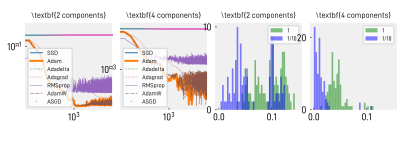

In [26]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__), dpi=300))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.04
dx = 0.24
w = 0.22
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.12,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]


def draw_bars(ax, h, offset, **kwargs):
    ax.bar(np.arange(len(h)) + offset, h, **kwargs)

bar_width = 0.4
bar_style = dict(
    width = 0.5*bar_width
)
svd_style = dict(
    color='r',
    label=r'\textbf{SVD}'
)
rbf_style = dict(
    color='k',
    label=r'\textbf{RBF}'
)
srbf_style = dict(
    color='g',
    label=r'\textbf{SRBF}'
)


axs[0].plot(x_20, y_20, lw = 1, label=name0)
axs[0].plot(x_21,y_21, '-',lw = 2, label=name1)
axs[0].plot( x_22,y_22, '--', label=name2)
axs[0].plot(x_23,y_23,':', label=name3)
axs[0].plot( x_24,y_24, label=name4)
axs[0].plot( x_25,y_25, '-.', label=name5)
axs[0].plot( x_26,y_26, ',', label=name6)

axs[1].plot(x_40, y_40, lw = 1, label=name40)
axs[1].plot(x_41,y_41, '-',lw = 2, label=name41)
axs[1].plot( x_42,y_42, '--', label=name42)
axs[1].plot(x_43,y_43,':', label=name43)
axs[1].plot( x_44,y_44, label=name44)
axs[1].plot( x_45,y_45, '-.', label=name45)
axs[1].plot( x_46,y_46, ',', label=name46)



axs[0].set_xscale('log') 
axs[0].set_yscale('log') 
axs[0].legend(
           loc='lower left', fontsize=6)
axs[1].set_xscale('log') 
axs[1].set_yscale('log') 
axs[1].legend(
           loc='lower left', fontsize=6)

HIST_BINS = np.linspace(0, 0.15, 50)
axs[2].hist(hist_21, HIST_BINS, alpha = 0.5, color='g', label='1')
axs[2].hist(hist_210, HIST_BINS, alpha = 0.5, color='b', label='1/10')
axs[2].legend(loc="upper right", fontsize=6)


axs[3].hist(hist_41, HIST_BINS, alpha = 0.5, color='g', label='1')
axs[3].hist(hist_410, HIST_BINS, alpha = 0.5, color='b', label='1/10')
axs[3].legend(loc="upper right", fontsize=6)

for i in range(2):
    axs[i].set_xbound(lower=-2, upper=50000)
    axs[i].set_ybound(lower=-0.1, upper=0.45)

    
title_style = dict(
    fontsize=8,
    y=0.975,
    va='bottom'
)

tick_style = dict(
    fontsize=7,
)
label_style = dict(
    fontsize=8,
    labelpad=0.75,
)

axs[0].set_title(r'\textbf{2 components}', **title_style)
axs[1].set_title(r'\textbf{4 components}', **title_style)
axs[2].set_title(r'\textbf{2 components}', **title_style)
axs[3].set_title(r'\textbf{4 components}', **title_style)




#if __PRODUCTION__:
##    fig.savefig(f'pgf/{__NAME__}.pgf', dpi=300)
#else:
#    fig.savefig(f'svg/{__NAME__}.svg', dpi=300)
plt.show()

In [16]:
!make -f Makefile.figures fig-"$__NAME__".pdf 2>&1 | tail -n 1

^C


END
---